In [98]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import math
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[7,7]

In [99]:
file_name = "par_out.txt"

file = open(file_name, 'r')

dim = 3
N_part = int(file.readline()) # read the first line where is written the number of particles
t_0 = file.readline() # read the second line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

N_part
print('initial time : ', t_0)
print('N_lines: ', N_lines)

initial time :  0.01423927931777384

N_lines:  102000


In [100]:
N_lines_snap = 2+N_part
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  1000.0


In [101]:
N_cols = 7
data = np.empty([int(N_snap), int(N_part), int(N_cols)])
times = np.zeros(int(N_snap))
#masses = np.empty([N_snap, N_part])

for i_snap in range(int(N_snap)):
    initial_line = i_snap * N_lines_snap
    data_init_line = initial_line + 2
    
    times[i_snap] = np.genfromtxt(file_name, skip_header=initial_line+1, max_rows=1)
    values = np.genfromtxt(file_name, skip_header=data_init_line, max_rows=N_part)
    data[i_snap] = values

print(data[0][0])

[ 1.00000000e+00 -6.84292078e+00 -7.36630076e-01  3.50005075e+00
  8.36140948e-03  2.26512914e-04 -3.20871858e-03]


In [102]:
masses = np.empty([int(N_snap), int(N_part)])
positions = np.empty([int(N_snap), int(N_part), dim])
velocities = np.empty([int(N_snap), int(N_part), dim])


for i in range(int(N_snap)):
    for j in range(int(N_part)):
        masses[i,j] = data[i,j,0]
        positions[i,j] = data[i,j,1:4]
        velocities[i,j] = data[i,j,4:]
        

        
index=np.array(range(N_part))
index=index[::5]

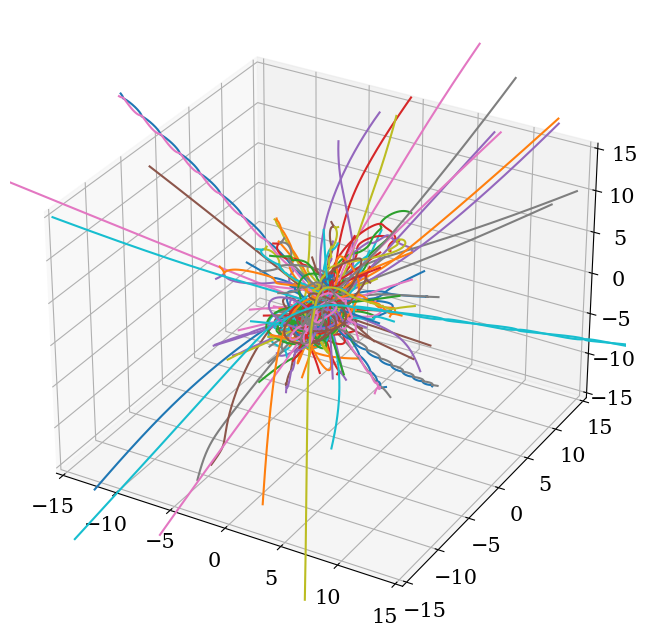

In [103]:
from mpl_toolkits import mplot3d

%matplotlib inline


fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

for i in range(N_part):
    ax.plot3D(positions[:,i,0], positions[:,i,1], positions[:,i,2])

ax.axes.set_xlim3d(left=-15, right=15) 
ax.axes.set_ylim3d(bottom=-15, top=15) 
ax.axes.set_zlim3d(bottom=-15, top=15) 
plt.show()

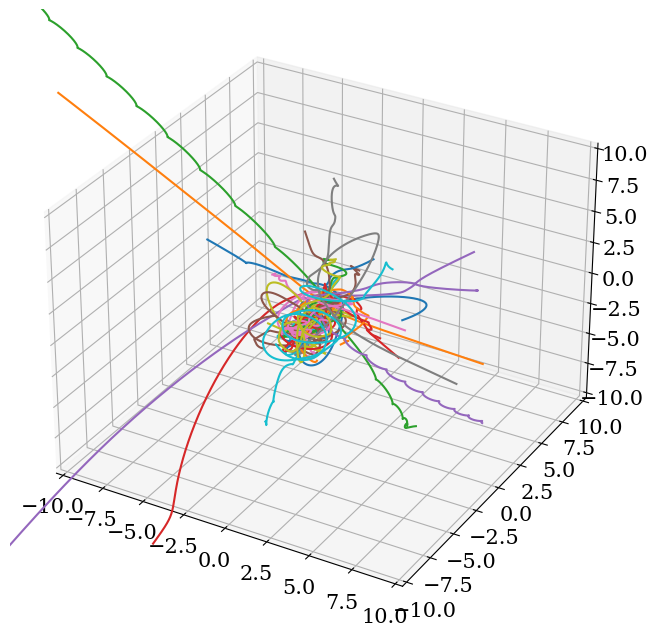

In [104]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

for i in index:
    ax.plot3D(positions[:,i,0], positions[:,i,1], positions[:,i,2])

ax.axes.set_xlim3d(left=-10, right=10) 
ax.axes.set_ylim3d(bottom=-10, top=10) 
ax.axes.set_zlim3d(bottom=-10, top=10) 
plt.show()

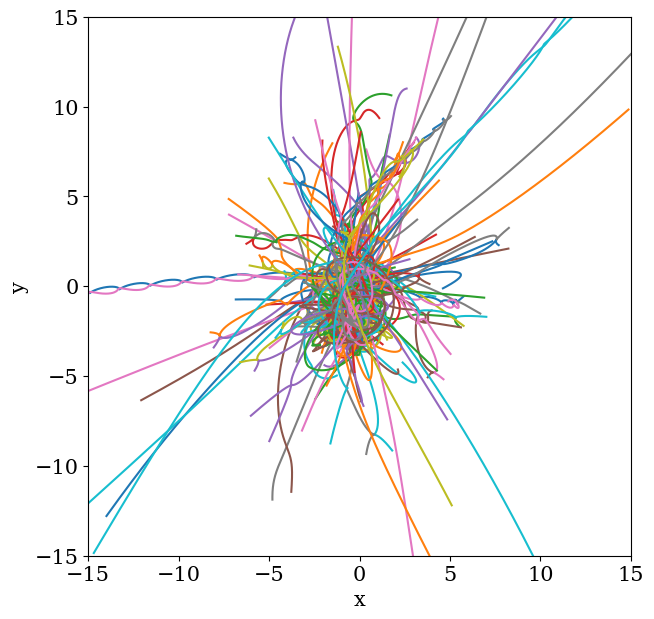

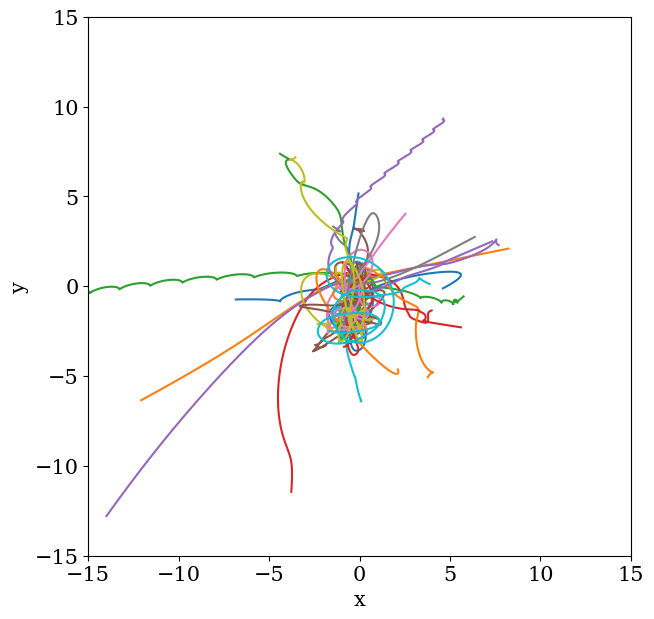

In [105]:
for i in range(N_part):
    plt.plot(positions[:,i,0], positions[:,i,1])
    
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()


for i in index:
    plt.plot(positions[:,i,0], positions[:,i,1])
    
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

In [129]:
t=np.linspace(0,15,int(N_snap))

for i in range(N_part):
    r=(positions[:,i,0]**2 + positions[:,i,1]**2 + positions[:,i,2]**2)**(1/2)
    plt.plot(t,r, lw=1)

plt.ylabel("r")
plt.xlabel("t")
plt.xlim(0,10)
plt.ylim(-1,20)
plt.show()

for i in index:
    r=(positions[:,i,0]**2 + positions[:,i,1]**2 + positions[:,i,2]**2)**(1/2)
    plt.plot(t,r)

plt.ylabel("r")
plt.xlabel("t")
plt.xlim(0,10)
plt.ylim(-1,20)
plt.show()

r0=(positions[0,:,0]**2 + positions[0,:,1]**2 + positions[0,:,2]**2)**(1)

for i in range(len(t))
    r1=(positions[i,:,0]**2 + positions[i,:,1]**2 + positions[i,:,2]**2)**(1) # distanza di tutte le particello ad un certo istante
    r_tot=(1/r0)*np.sum(r1) # Somma delle distanze di tutte le particelle dal centro ad un certo istante normalizzata da r0
    plt.plot(t,r_tot)

plt.ylabel("r")
plt.xlabel("t")
plt.xlim(0,10)
plt.ylim(-1,20)
plt.show()


SyntaxError: expected ':' (3221271285.py, line 25)

In [111]:

rho=3*N_part/(4 * math.pi * 10**3)
t_dyn=(3*math.pi/(16*rho))**(1/2)
t_coll=t_dyn/(2)**(1/2)
print('density : ', rho)
print('t_dyn : ', t_dyn)
print('t_coll : ', t_coll)

density :  0.023873241463784303
t_dyn :  4.967294132898051
t_coll :  3.512407365520363


In [116]:
t

array([ 0.        ,  0.01501502,  0.03003003,  0.04504505,  0.06006006,
        0.07507508,  0.09009009,  0.10510511,  0.12012012,  0.13513514,
        0.15015015,  0.16516517,  0.18018018,  0.1951952 ,  0.21021021,
        0.22522523,  0.24024024,  0.25525526,  0.27027027,  0.28528529,
        0.3003003 ,  0.31531532,  0.33033033,  0.34534535,  0.36036036,
        0.37537538,  0.39039039,  0.40540541,  0.42042042,  0.43543544,
        0.45045045,  0.46546547,  0.48048048,  0.4954955 ,  0.51051051,
        0.52552553,  0.54054054,  0.55555556,  0.57057057,  0.58558559,
        0.6006006 ,  0.61561562,  0.63063063,  0.64564565,  0.66066066,
        0.67567568,  0.69069069,  0.70570571,  0.72072072,  0.73573574,
        0.75075075,  0.76576577,  0.78078078,  0.7957958 ,  0.81081081,
        0.82582583,  0.84084084,  0.85585586,  0.87087087,  0.88588589,
        0.9009009 ,  0.91591592,  0.93093093,  0.94594595,  0.96096096,
        0.97597598,  0.99099099,  1.00600601,  1.02102102,  1.03

In [121]:
index(t)


TypeError: 'numpy.ndarray' object is not callable